**Problem Statement :** 
This Mall wants to get insights of their customers. We have to build a system that can cluster customers into different groups. so one group of customer may represent those tend to purchase the more that mall, some other group may represent group of customers that don't purchase that much in amount. so this group of customer will give us insights and details that mall to make better decisions to make better marketing strategy.

**Dataset Link :** 

https://drive.google.com/file/d/10MyIuEwrmaCx2yUiXnkmQaRArElZhjV2/view?usp=sharing
https://drive.google.com/file/d/1fNnvlV1J0Ie2IVm15SKffvQZQpMV0xRj/view?usp=sharing

**Mall Customers Dataset with KMeans Clustering**

**Importing Python Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore")

**Data Collection,Analysis and Visualization**

In [2]:
# Loading the data
data = pd.read_csv("Mall_Customers.csv")
data.head(2) # Shows First two rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [3]:
data.shape, data.columns

((200, 5),
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
        'Spending Score (1-100)'],
       dtype='object'))

In [4]:
data.isna().sum() # There is no missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [6]:
data.info() # This shows null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe() #This is to know descriptive statistics summary

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
correlation = data.corr()

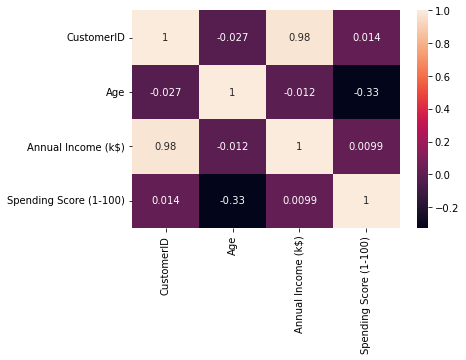

In [9]:
sns.heatmap(correlation, annot = True)
plt.show()

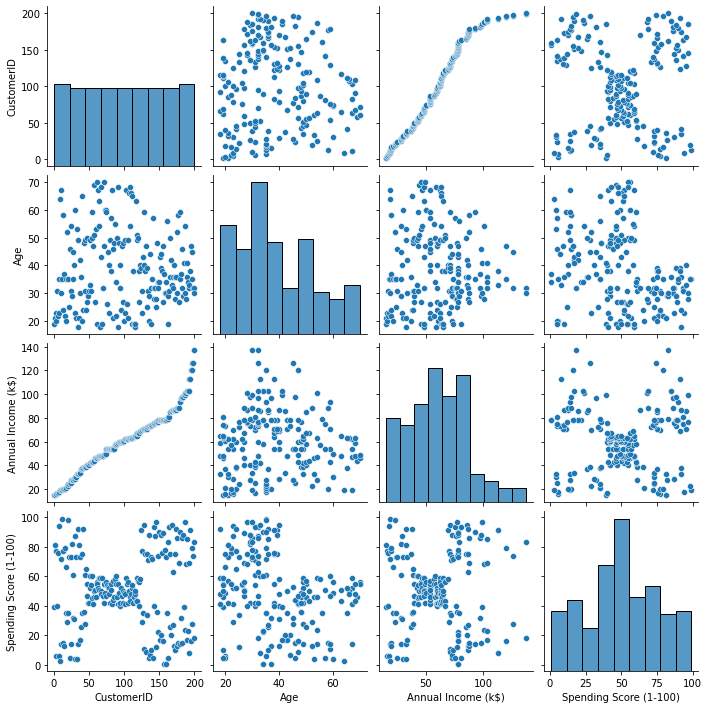

In [10]:
sns.pairplot(data);

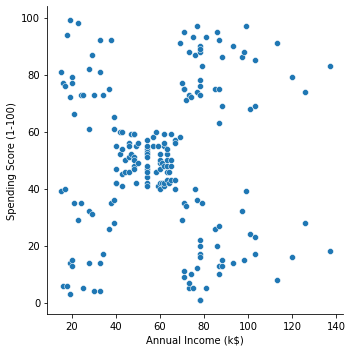

In [11]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data);

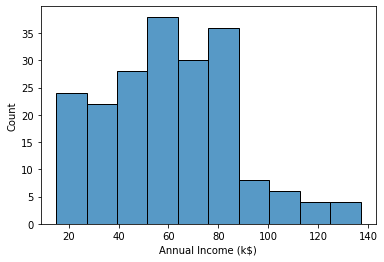

In [12]:
sns.histplot(data['Annual Income (k$)']);

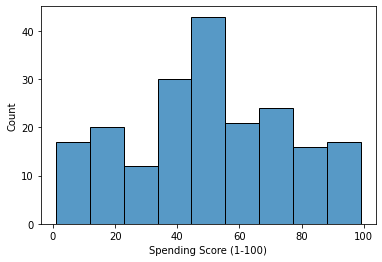

In [13]:
sns.histplot(data['Spending Score (1-100)']);

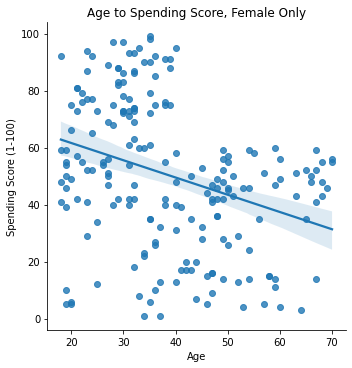

In [14]:
sns.lmplot('Age', 'Spending Score (1-100)', data)
plt.title('Age to Spending Score, Female Only');

In [15]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Segment Extraction (Clustering)**

In [16]:
# WCSS - Within Cluster Sum of Squares
WCSS = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

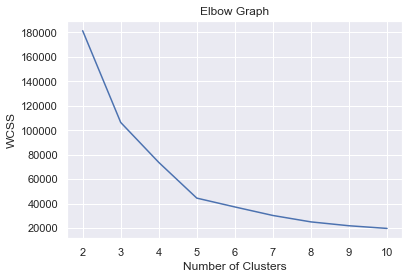

In [17]:
sns.set()
plt.plot(range(2, 11), WCSS)
plt.title("Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Number of clusters : 5

In [18]:
# Training the Model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
kmeans.fit(x)
#return the label for each data point based on cluster
y = kmeans.predict(x)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [19]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

**Visualization of Clusters(Segments)**

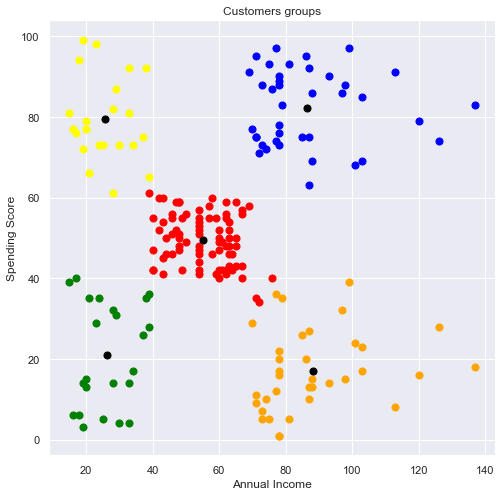

In [20]:

#Plotting all the Clusters
plt.figure(figsize = (8,8))
plt.scatter(x[y == 0, 0], x[y == 0, 1], c = 'orange', label = 'Cluster 1', s = 50)
plt.scatter(x[y == 1, 0], x[y == 1, 1], c = 'red', label = 'Cluster 2', s = 50)
plt.scatter(x[y == 2, 0], x[y == 2, 1], c = 'blue', label = 'Cluster 3', s = 50)
plt.scatter(x[y == 3, 0], x[y == 3, 1], c = 'yellow', label = 'Cluster 4', s = 50)
plt.scatter(x[y == 4, 0], x[y == 4,1], c = 'green', label = 'Cluster 5', s = 50)

# Plotting all the Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, color = 'black', label = 'Centroids')
plt.title("Customers groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

**Data Preprocessing for Profiling and Describing Segments**

In [21]:
data["Clusters"]=kmeans.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [22]:
 data.drop(["CustomerID","Gender"], axis=1, inplace=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [23]:
CustomerMagnitue_df = pd.DataFrame(data.Clusters.value_counts().reset_index())
CustomerMagnitue_df.rename(columns={"index": "Customer_Groups",
                               "Clusters": "Customer Group Magnitude"},inplace=True)
CustomerMagnitue_df

,Customer_Groups,Customer Group Magnitude
0,1,81
1,2,39
2,0,35
3,4,23
4,3,22


**Profiling Segments**

In [24]:
data_groupded=data.groupby(by=["Clusters"]).mean().reset_index()
data_groupded.rename(columns={"Clusters":"Customer_Groups"},inplace=True)
data_groupded

,Customer_Groups,Age,Annual Income (k$),Spending Score (1-100)
0,0,41.114286,88.200000,17.114286
1,1,42.716049,55.296296,49.518519
2,2,32.692308,86.538462,82.128205
3,3,25.272727,25.727273,79.363636
4,4,45.217391,26.304348,20.913043


In [25]:
profilling=pd.merge(data_groupded,CustomerMagnitue_df, on="Customer_Groups")
profilling

,Customer_Groups,Age,Annual Income (k$),Spending Score (1-100),Customer Group Magnitude
0,0,41.114286,88.200000,17.114286,35
1,1,42.716049,55.296296,49.518519,81
2,2,32.692308,86.538462,82.128205,39
3,3,25.272727,25.727273,79.363636,22
4,4,45.217391,26.304348,20.913043,23


**Describing Segments**

In [26]:
data_new = pd.read_csv("Mall_Customers.csv")
data_new["Clusters"]=kmeans.labels_
data_new.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


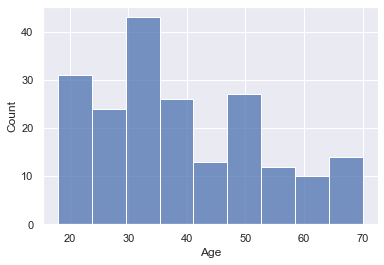

In [27]:
sns.histplot(data['Age']);

In [28]:
clust_1 = pd.DataFrame()
clust_2 = pd.DataFrame()
clust_3 = pd.DataFrame()
clust_4 = pd.DataFrame()
clust_5 = pd.DataFrame()

In [29]:
clust_1 = data_new.loc[data['Clusters'] == 0]
clust_2 = data_new.loc[data['Clusters'] == 1]
clust_3 = data_new.loc[data['Clusters'] == 2]
clust_4 = data_new.loc[data['Clusters'] == 3]
clust_5 = data_new.loc[data['Clusters'] == 4]

        

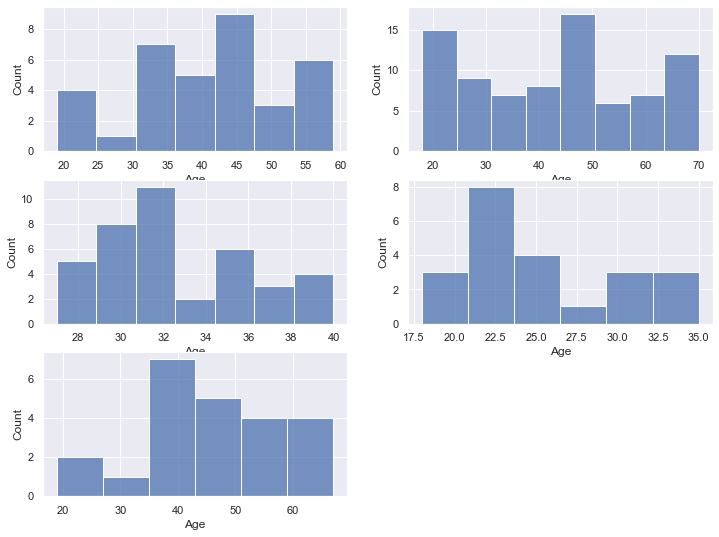

In [30]:
plt.figure(figsize=(12,9))

plt.tight_layout(pad=4.0)
plt.subplot(3,2,1)
sns.histplot(clust_1['Age'])
plt.subplot(3,2,2)
sns.histplot(clust_2['Age'])
plt.subplot(3,2,3)
sns.histplot(clust_3['Age'])
plt.subplot(3,2,4)
sns.histplot(clust_4['Age'])
plt.subplot(3,2,5)
sns.histplot(clust_5['Age']);

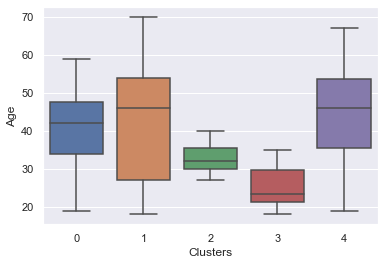

In [31]:
sns.boxplot(data = data,x = 'Clusters',y = 'Age');

**Selecting Target Segment(s)**

In [32]:
clust_1['Gender'].value_counts()

Male      19
Female    16
Name: Gender, dtype: int64

In [33]:
clust_2['Gender'].value_counts()

Female    48
Male      33
Name: Gender, dtype: int64

In [34]:
clust_3['Gender'].value_counts()

Female    21
Male      18
Name: Gender, dtype: int64

In [35]:
clust_4['Gender'].value_counts()

Female    13
Male       9
Name: Gender, dtype: int64

In [36]:
clust_5['Gender'].value_counts()

Female    14
Male       9
Name: Gender, dtype: int64

In [37]:
df1 = pd.read_csv("Segment_Evaluation_Data.csv")
df1.head()

,Customer_Groups,Average Age,Rating(Value)_Age,Rating(Value)_Gender,Segment Attractiveness,Average Annual Income(k$),Rating(Value)_Annual_Income(k$),Average Spending Score(1-100),Rating(Value)_Spending_Score(1-100),Organizational Competitiveness
0,0,41.114286,5,6,5.5,88.200000,9,17.114286,2,4.45
1,1,42.716049,5,7,6.0,55.296296,6,49.518519,5,5.35
2,2,32.692308,8,6,7.0,86.538462,8,82.128205,9,8.65
3,3,25.272727,7,7,7.0,25.727273,3,79.363636,8,6.25
4,4,45.217391,5,7,6.0,26.304348,3,20.913043,2,2.35


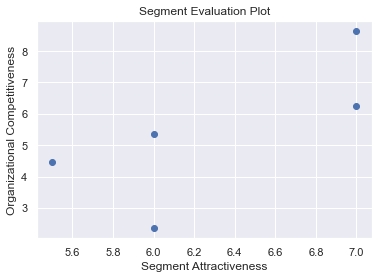

In [38]:
x = np.asarray(df1['Segment Attractiveness']).astype(np.float32)
y = np.asarray(df1['Organizational Competitiveness']).astype(np.float32)
plt.scatter(x,y)
plt.xlabel('Segment Attractiveness')
plt.ylabel('Organizational Competitiveness')
plt.title('Segment Evaluation Plot');

**Segment number 3 (one with highest segment attractiveness and highest organizational competitiveness is selected as the target segment.**

# Thank You!!